## Basic setup

In [4]:
options(repr.plot.width=4, repr.plot.height=3, scipen=999)

### Load libraries

In [5]:
library(ggplot2)

### Dimension / size / shape of dataframe

In [8]:
dim(midwest)

[1] 437  28

In [9]:
head(midwest)

PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,⋯,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
561,ADAMS,IL,0.052,66090,1270.9615,63917,1702,98,249,⋯,19.63139,4.355859,63628,96.27478,13.151443,18.01172,11.009776,12.443812,0,AAR
562,ALEXANDER,IL,0.014,10626,759.0000,7054,3496,19,48,⋯,11.24331,2.870315,10529,99.08714,32.244278,45.82651,27.385647,25.228976,0,LHR
563,BOND,IL,0.022,14991,681.4091,14477,429,35,16,⋯,17.03382,4.488572,14235,94.95697,12.068844,14.03606,10.852090,12.697410,0,AAR
564,BOONE,IL,0.017,30806,1812.1176,29344,127,46,150,⋯,17.27895,4.197800,30337,98.47757,7.209019,11.17954,5.536013,6.217047,1,ALU
565,BROWN,IL,0.018,5836,324.2222,5264,547,14,5,⋯,14.47600,3.367680,4815,82.50514,13.520249,13.02289,11.143211,19.200000,0,AAR
566,BUREAU,IL,0.050,35688,713.7600,35157,50,65,195,⋯,18.90462,3.275891,35107,98.37200,10.399635,14.15882,8.179287,11.008586,0,AAR


### Load the data

In [11]:
data("midwest", package="ggplot2")
# midwest <- read.csv("http://goo.gl/G1K41K") # alt source 

## Simple plot

- geom_point
- geom_smooth
    * `se=FALSE` 控制有沒有 confidence band

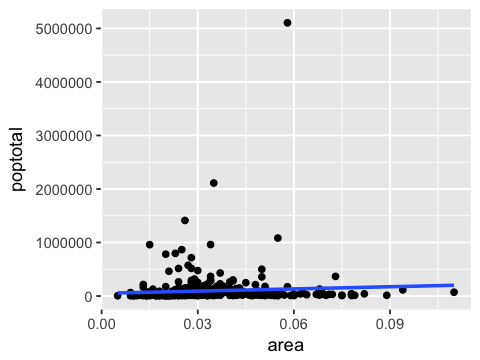

In [31]:
plot <- ggplot(midwest, aes(x=area, y=poptotal)) + geom_point() + geom_smooth(method='lm', se=FALSE)
plot

## 調整 x, y 軸 limit

1. 直接刪除 outliers
    - ylim
    - xlim
2. Zoom in
    - coord_cartesian

In [38]:
library(gridExtra)

Warning message:
“Removed 5 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 5 rows containing missing values (geom_point).”

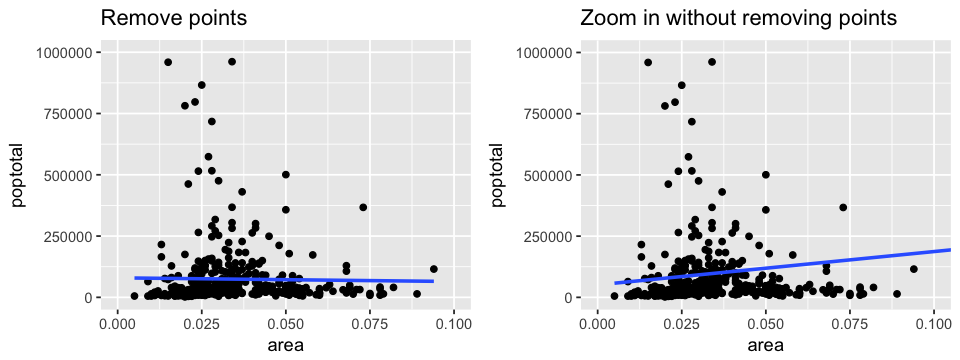

In [46]:
xlim <- c(0, 0.1)
ylim <- c(0, 1000000)
plot1 <- plot + xlim(xlim) + ylim(ylim) + labs(title="Remove points")
plot2 <- plot + coord_cartesian(xlim=xlim, ylim=ylim) + labs(title="Zoom in without removing points")
options(repr.plot.width=8)
grid.arrange(plot1, plot2, ncol=2)

## 設定 title / labels

In [48]:
options(repr.plot.width=4)

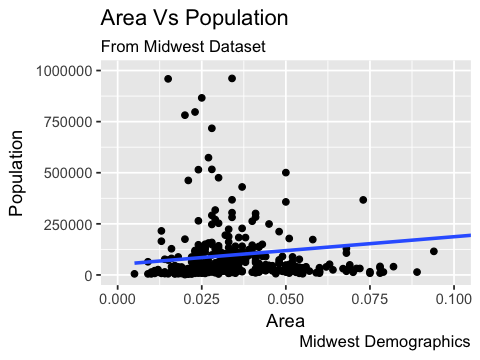

In [55]:
plot2 + labs(title="Area Vs Population", subtitle="From Midwest Dataset",
             x="Area", y="Population", caption="Midwest Demographics")

## 改變點的顏色 / 形狀

- 色盲最佳 palette
    - [ggthemes](https://github.com/jrnold/ggthemes) + `scale_colour_colorblind`
- 調整某個 geom 的所有「點」的形狀時 `size` 要定義在 `aes()` 之外

In [59]:
install.packages('ggthemes', dependencies = TRUE)

also installing the dependencies ‘Rttf2pt1’, ‘igraph’, ‘extrafont’, ‘lintr’, ‘mapproj’, ‘pander’, ‘testthat’

Warning message in install.packages("ggthemes", dependencies = TRUE):
“installation of package ‘Rttf2pt1’ had non-zero exit status”Warning message in install.packages("ggthemes", dependencies = TRUE):
“installation of package ‘igraph’ had non-zero exit status”Warning message in install.packages("ggthemes", dependencies = TRUE):
“installation of package ‘extrafont’ had non-zero exit status”Warning message in install.packages("ggthemes", dependencies = TRUE):
“installation of package ‘lintr’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [60]:
library(ggthemes)

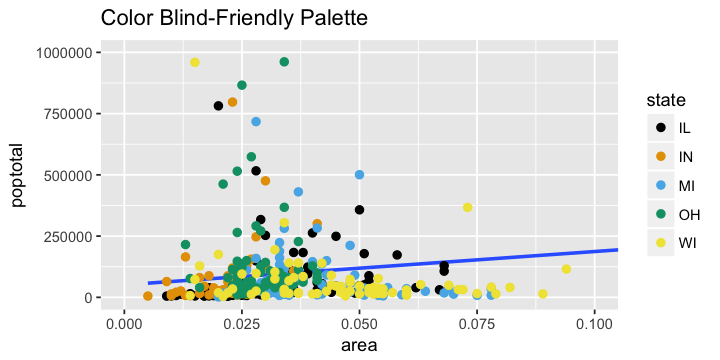

In [81]:
options(repr.plot.width=6, height=4.5)
plot3 <- plot2 + geom_point(aes(x=area, y=poptotal, color=state), size=2) +
    scale_colour_colorblind() + labs(title="Color Blind-Friendly Palette")
plot3

### 使用其他 Color-bliind Palette

In [80]:
library(RColorBrewer)
head(brewer.pal.info, 5)  # show 10 palettes

,maxcolors,category,colorblind
BrBG,11,div,TRUE
PiYG,11,div,TRUE
PRGn,11,div,TRUE
PuOr,11,div,TRUE
RdBu,11,div,TRUE


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


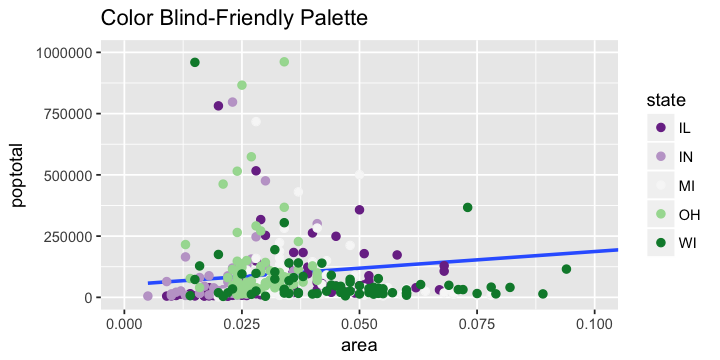

In [84]:
plot3 + scale_colour_brewer(palette='PRGn')

## 改變軸上刻度 / 標籤

- breaks: `seq`
- labels: `letters`

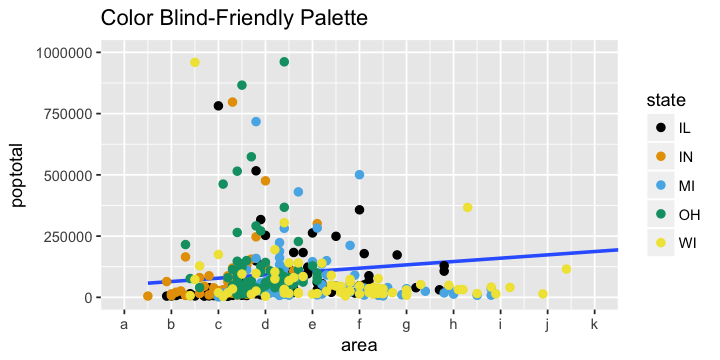

In [103]:
plot3 + scale_x_continuous(breaks=seq(0, 0.1, 0.01), labels=letters[1:11])

### 反轉軸

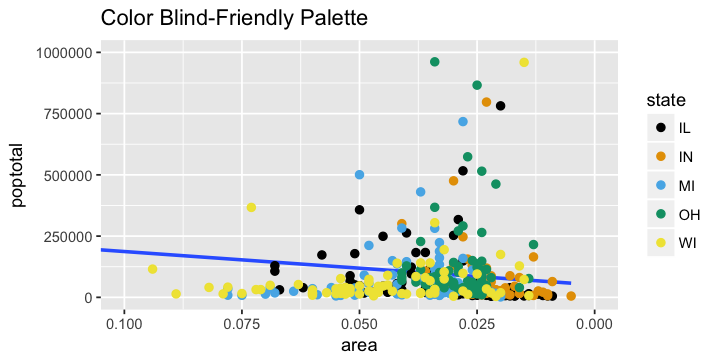

In [104]:
plot3 + scale_x_reverse()

## Format 軸上 Text

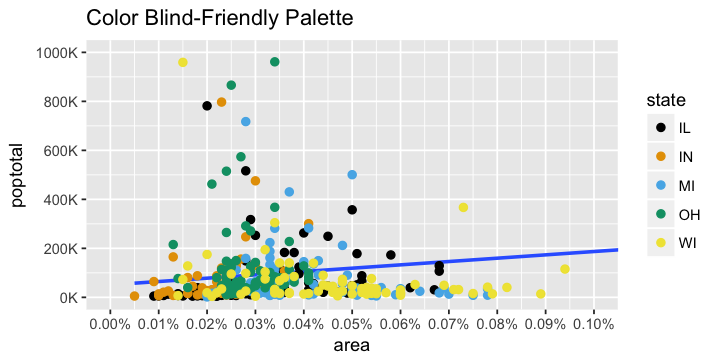

In [105]:
plot3 + scale_x_continuous(breaks=seq(0, 0.1, 0.01), labels = sprintf("%1.2f%%", seq(0, 0.1, 0.01))) + 
  scale_y_continuous(breaks=seq(0, 1000000, 200000), labels = function(x){paste0(x/1000, 'K')})

## 主題

主要有兩種方式：
- 使用 `theme_set()` 套用設定主題到所有 plot
- 個別 plot 使用 `+ theme_bw()` 的方式

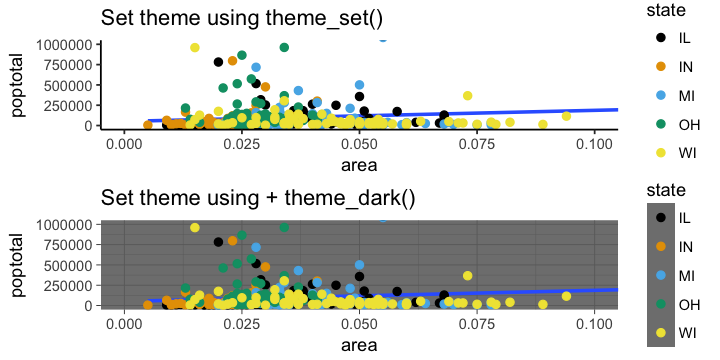

In [120]:
theme_set(theme_classic())
grid.arrange(plot3 + labs(title="Set theme using theme_set()"), 
             plot3 + theme_dark() + labs(title="Set theme using + theme_dark()"))

還原到初始主題

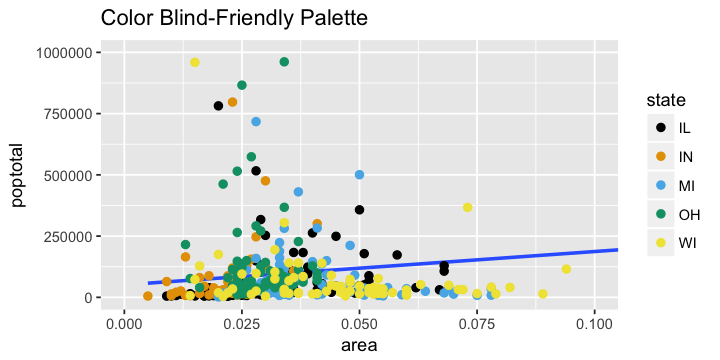

In [116]:
theme_set(theme_grey())
plot3